# __SpringBoard Mini-Project: Take Home Challenge 2__
## __Interview Prep__

__Written by: Sofy Weisenberg__<br>
__Date: 05/03/20__


__Data Analysis Interview Challenge__

The data is available as two attached CSV files:
takehome_user_engagement. csv
takehome_users . csv
The data has the following two tables:<br>

__1)__ A user table ( "takehome_users" ) with data on 12,000 users who signed up for the product in the last two years. This table includes:
- name: the user's name
- object_id: the user's id
- email: email address
- creation_source: how their account was created. This takes on one of 5 values:
    - PERSONAL_PROJECTS: invited to join another user'spersonal workspace
    - GUEST_INVITE: invited to an organization as a guest (limited permissions)
    - ORG_INVITE: invited to an organization (as a full member)
    - SIGNUP: signed up via the website
    - SIGNUP_GOOGLE_AUTH: signed up using Google Authentication (using a Google email account for their login id)
- creation_time: when they created their account
- last_session_creation_time: unix timestamp of last login
- opted_in_to_mailing_list: whether they have opted into receiving marketing emails
- enabled_for_marketing_drip: whether they are on the regular marketing email drip
- org_id: the organization (group of users) they belong to
- invited_by_user_id: which user invited them to join (if applicable).

__2)__ A usage summary table ( "takehome_user_engagement" ) that has a row for each day that a user logged into the product. 

Defining an "adopted user" as a user who has logged into the product on three separate days in at least one sevenday period, identify which factors predict future user adoption .

We suggest spending 1-2 hours on this, but you're welcome to spend more or less. Please send us a brief writeup of your findings (the more concise, the better no more than one page), along with any summary tables, graphs, code, or queries that can help us understand your approach. Please note any factors you considered or investigation you did, even if they did not pan out. Feel free to identify any further research or data you think would be valuable.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import time

# Use the current working directory path to navigate to the location of the data
cwd_path = os.getcwd()
table1_path = os.path.join(cwd_path, 'takehome_users.csv')
table2_path = os.path.join(cwd_path, 'takehome_user_engagement.csv')

# Throw an assert error if the paths do not exist
assert os.path.exists(table1_path)
assert os.path.exists(table2_path)

In [2]:
# get data info summary for table 1
table1 = pd.read_csv(table1_path, encoding='latin-1')
table1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [3]:
table1[table1.invited_by_user_id.isnull() == False].head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [4]:
# get data info summary for table 2
table2 = pd.read_csv(table2_path)
table2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [5]:
table1.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [6]:
table2[table2.user_id==1]

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1


In [7]:
# convert time_stamp data into datetime format so that differences may be calculated
table2.time_stamp = pd.to_datetime(table2.time_stamp)
table2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time_stamp  207917 non-null  datetime64[ns]
 1   user_id     207917 non-null  int64         
 2   visited     207917 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB


In [8]:
# get a list of all "adopted users" by looping through each user id and finding which logged in 3 times in 7 days, at least once
adopted_users = []

for idx, value in table1.iterrows():
    user_logins = table2[table2.user_id == table1.object_id[idx]].reset_index()
    if len(user_logins) > 2:
        for i in range(0, len(user_logins)-2):
             if user_logins.time_stamp[i+2] - user_logins.time_stamp[i] <= pd.Timedelta(7,'D'):
                adopted_users.append(table1.object_id[idx])
                break
            

In [9]:
# table1: add a bool [0/1] column for adopted users (this can be the class label/dependent variable for model/analysis)

table1['adopted_user'] = 1 * (table1['object_id'].isin(adopted_users))
adoption_ratio_overall = table1.adopted_user[table1.adopted_user == 1].count()/table1.adopted_user.count()
adoption_ratio_overall

0.138

In [10]:
# continue building table1 as the full feature/label table which can later be split for X, y
# create additional columns of interest: change 2 cols to datetime, make creation_source one hot encoded, 
import datetime

table1.creation_time = pd.to_datetime(table1.creation_time)
table1.last_session_creation_time = pd.to_datetime(table1.last_session_creation_time,unit='s')
table1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  8823 non-null   datetime64[ns]
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          6417 non-null   float64       
 10  adopted_user                12000 non-null  int32         
dtypes: datetime64[ns](2), float64(1), int32(1), int64(4), 

In [11]:
# calculate for users with more than 1 login, how long it took for the second login and for the third login and NaN otherwise
table1['time_to_second_login'] = np.nan
table1['time_to_third_login'] = np.nan

for idx, value in table1.iterrows():
    user_logins = table2[table2.user_id == table1.object_id[idx]].reset_index()
    if len(user_logins) > 0:
        # for some, the creation time is written as the second login as well, but should not register "0 days" between logins
        if user_logins.iloc[0][1] == table1.creation_time.iloc[idx]:
            table1['time_to_second_login'].iloc[idx] = np.nan
        else:
            table1['time_to_second_login'].iloc[idx] = pd.Timedelta(user_logins.iloc[0][1]-table1.creation_time.iloc[idx],'D').days
    if len(user_logins) > 1:
        if user_logins.iloc[0][1] == table1.creation_time.iloc[idx]:
            table1['time_to_second_login'].iloc[idx] = pd.Timedelta(user_logins.iloc[1][1]-user_logins.iloc[0][1],'D').days
        else:
            table1['time_to_third_login'].iloc[idx] = pd.Timedelta(user_logins.iloc[1][1]-user_logins.iloc[0][1],'D').days

C:\Users\Niv\Anaconda3\envs\tf_keras_gpu\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [28]:
# create feature matrix X from Table 1 without columns: object_id, creation_time, name, email, last_session_creation_time, org_id, invited_by_user_id, adopted_user

X = table1.drop(['object_id', 'creation_time', 'name', 'email', 'last_session_creation_time', 'org_id', 'invited_by_user_id', 'adopted_user'], axis=1)
X = X.join(pd.get_dummies(X['creation_source'],prefix='creation',drop_first=True)).drop(['creation_source'], axis=1)

# create label vector y from adopted_user
y = table1.adopted_user

In [29]:
X.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,time_to_second_login,time_to_third_login,creation_ORG_INVITE,creation_PERSONAL_PROJECTS,creation_SIGNUP,creation_SIGNUP_GOOGLE_AUTH
0,1,0,NaN,NaN,0,0,0,0
1,0,0,14.0,NaN,1,0,0,0
2,0,0,NaN,NaN,1,0,0,0
3,0,0,1.0,NaN,0,0,0,0
4,0,0,5.0,NaN,0,0,0,0


In [30]:
#calculate the ratio of adopted users from the subgroups with at least 2 logins and with at least 3 logins
table1_sub = table1[table1.time_to_third_login > 0]
adoption_ratio_3_logins = table1_sub.time_to_third_login[table1_sub.adopted_user == 1].count()/table1_sub.time_to_third_login.count()
table2_sub = table1[table1.time_to_second_login > 0]
adoption_ratio_2_logins = table2_sub.time_to_second_login[table2_sub.adopted_user == 1].count()/table2_sub.time_to_second_login.count()
round(adoption_ratio_2_logins,2), round(adoption_ratio_3_logins,2)

(0.29, 0.63)

Compared to the overall user group, the ratio of adoption doubles among users with 2 or more logins and increases a factor of 6 among users with 3 or more logins.

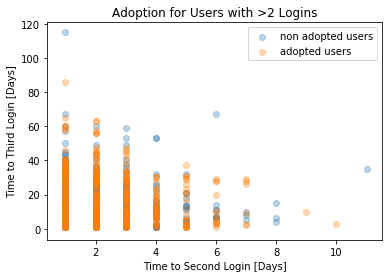

In [31]:
fig, ax = plt.subplots()

scatter = ax.scatter(table1_sub.time_to_second_login[table1_sub.adopted_user == 0],table1_sub.time_to_third_login[table1_sub.adopted_user == 0], label='non adopted users', alpha = 0.3)
scatter = ax.scatter(table1_sub.time_to_second_login[table1_sub.adopted_user == 1],table1_sub.time_to_third_login[table1_sub.adopted_user == 1], label='adopted users', alpha = 0.3)
ax.set_xlabel('Time to Second Login [Days]')
ax.set_ylabel('Time to Third Login [Days]')
ax.set_title('Adoption for Users with >2 Logins')
legend1 = ax.legend(loc="upper right")

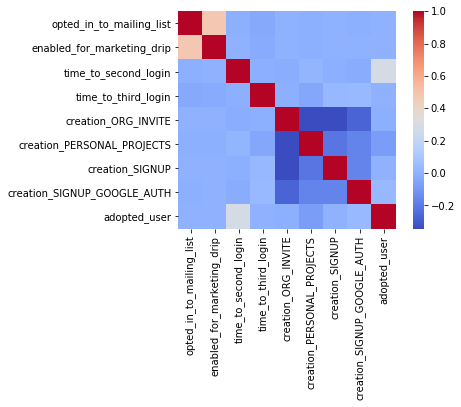

In [32]:
# calculate correlation matrix and plot heatmaps
X_labeled = X.join(table1.adopted_user)
corrmat = X_labeled.corr()

sns.heatmap(corrmat, vmax=1., square=True, cmap = 'coolwarm')

Now let's try to use a logistic regression classifier to create a predictive model for user adoption. Let's focus on the group with at least 3 logins (1265 users).

In [33]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   opted_in_to_mailing_list     12000 non-null  int64  
 1   enabled_for_marketing_drip   12000 non-null  int64  
 2   time_to_second_login         5796 non-null   float64
 3   time_to_third_login          1265 non-null   float64
 4   creation_ORG_INVITE          12000 non-null  uint8  
 5   creation_PERSONAL_PROJECTS   12000 non-null  uint8  
 6   creation_SIGNUP              12000 non-null  uint8  
 7   creation_SIGNUP_GOOGLE_AUTH  12000 non-null  uint8  
dtypes: float64(2), int64(2), uint8(4)
memory usage: 422.0 KB


In [35]:
#X = X[X.time_to_third_login.isnull() == False].drop('time_to_third_login', 'time_to_second_login', 'label',axis=1)
X = X.drop(['time_to_third_login', 'time_to_second_login'],axis=1)
X.info()

#y = table1.adopted_user[table1.time_to_third_login.isnull() == False]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   opted_in_to_mailing_list     12000 non-null  int64
 1   enabled_for_marketing_drip   12000 non-null  int64
 2   creation_ORG_INVITE          12000 non-null  uint8
 3   creation_PERSONAL_PROJECTS   12000 non-null  uint8
 4   creation_SIGNUP              12000 non-null  uint8
 5   creation_SIGNUP_GOOGLE_AUTH  12000 non-null  uint8
dtypes: int64(2), uint8(4)
memory usage: 234.5 KB


In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify = y)

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold

# define default random state so that all future random actions will be repeatable
random_state = np.random.RandomState(0)

#initialize a logistic regression model
logistic = LogisticRegression(random_state=random_state)

# define hyperparameter options
penalty = ['l1', 'l2']
C = [0.0000000001, 0.00001, 0.01, 1]
#class_weight = [{1:0.3, 0:0.7}, {1:0.5, 0:0.5}, {1:0.7, 0:0.3}]
solver = ['liblinear', 'saga']

param_grid = dict(penalty=penalty,
                  C=C,
                  #class_weight=class_weight,
                  solver=solver)

# scoring is F1 = 2 * (precision * recall) / (precision + recall)
grid = GridSearchCV(estimator=logistic,
                    param_grid=param_grid,
                    scoring='accuracy',
                    verbose=1,
                    n_jobs=-1,
                    cv = StratifiedKFold(n_splits=5, shuffle=True))

grid_result = grid.fit(X_train, y_train)

print('Best Score: ' '{0:0.4f}'.format(grid_result.best_score_))
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Best Score: 0.8620
Best Params:  {'C': 1e-10, 'penalty': 'l1', 'solver': 'liblinear'}


[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    0.3s finished


In [57]:
from sklearn.metrics import average_precision_score

model = grid_result.best_estimator_
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

In [58]:
# define function for creating labeled confusion matrix for multiclass identification
def labeled_confusion_mat(true_vector, pred_vector, labels):
    confusion_matrix_labeled = pd.DataFrame(confusion_matrix(true_vector, pred_vector))
    confusion_matrix_labeled.columns = list(labels)
    confusion_matrix_labeled.index = list(labels)
    return confusion_matrix_labeled

In [59]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
fp_rate = confusion_matrix(y_test, y_pred)[0][1] / (confusion_matrix(y_test, y_pred)[0][0] + confusion_matrix(y_test, y_pred)[0][1])
fn_rate = confusion_matrix(y_test, y_pred)[1][0] / (confusion_matrix(y_test, y_pred)[1][0] + confusion_matrix(y_test, y_pred)[1][1])

# print confusion matrix and classification report for model performance on test set
labels = ['Not Adopted', 'Adopted']
print('Confusion matrix for LR model evaluation on test set:\n')
print(labeled_confusion_mat(y_test, y_pred, labels))
print(f'\nOverall error rate is {round(error_rate,2)}.')
print(f'False positive rate is {round(fp_rate,2)}.')
print(f'False negative rate is {round(fn_rate,2)}.')
print('\n\nClassification report for LR model evaluation on test set:\n')
print(classification_report(y_test, y_pred, target_names=labels))

Confusion matrix for LR model evaluation on test set:

             Not Adopted  Adopted
Not Adopted         2586        0
Adopted              414        0

Overall error rate is 0.14.
False positive rate is 0.0.
False negative rate is 1.0.


Classification report for LR model evaluation on test set:

              precision    recall  f1-score   support

 Not Adopted       0.86      1.00      0.93      2586
     Adopted       0.00      0.00      0.00       414

    accuracy                           0.86      3000
   macro avg       0.43      0.50      0.46      3000
weighted avg       0.74      0.86      0.80      3000



C:\Users\Niv\Anaconda3\envs\tf_keras_gpu\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Feature: 0, Score: 0.0525, opted_in_to_mailing_list
Feature: 1, Score: -0.0156, enabled_for_marketing_drip
Feature: 2, Score: -0.2531, creation_ORG_INVITE
Feature: 3, Score: -0.8196, creation_PERSONAL_PROJECTS
Feature: 4, Score: -0.2018, creation_SIGNUP
Feature: 5, Score: 0.0000, creation_SIGNUP_GOOGLE_AUTH


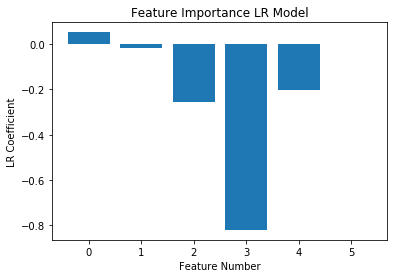

In [51]:
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.4f, ' % (i,v) + list(X.columns)[i])
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.xticks([x for x in range(len(importance))])
plt.xlabel('Feature Number')
plt.ylabel('LR Coefficient')
plt.title('Feature Importance LR Model')
plt.show()

Although the above model only predicts the trivial case (no adopted users) and is therefore not effective as a classifier in itself, it does provide some idea of feature importance. The positive scores indicate a feature that predicts class 1 (adopted_user), whereas the negative scores indicate a feature that predicts class 0 (non-adopted user).

It appears that the mailing list and marketing drip are far less important factors than the creation_source. Those with accounts created through the PERSONAL_PROJECTS source appeared to be the least likely to be adopted. This can be further confirmed by grouping the adopted users by creation_source and looking at the adopted users ratio (see below).

In [71]:
# ratio of adopted users by creation_source
print('Adopted user ratio by creation source:')
table1[table1.adopted_user == 1].groupby('creation_source').object_id.count()/table1.groupby('creation_source').object_id.count()

Adopted user ratio by creation source:


creation_source
GUEST_INVITE          0.170596
ORG_INVITE            0.134932
PERSONAL_PROJECTS     0.081478
SIGNUP                0.144705
SIGNUP_GOOGLE_AUTH    0.172563
Name: object_id, dtype: float64

In [84]:
# ratio of adopted users by mailing list opted in or out
ratio_opted_in = table1[(table1.adopted_user == 1) & (table1.opted_in_to_mailing_list == 1)].object_id.count()/table1.object_id.count()
ratio_opted_out = table1[(table1.adopted_user == 1) & (table1.opted_in_to_mailing_list == 0)].object_id.count()/table1.object_id.count()
print(f'Adopted user ratio for users opted in to mailing list: {round(ratio_opted_in,2)}')
print(f'\nAdopted user ratio for users opted out of mailing list: {round(ratio_opted_out,2)}')


Adopted user ratio for users opted in to mailing list: 0.04

Adopted user ratio for users opted out of mailing list: 0.1


In [85]:
# ratio of adopted users by enabled_for_marketing_drip
ratio_enabled_marketing = table1[(table1.adopted_user == 1) & (table1.enabled_for_marketing_drip == 1)].object_id.count()/table1.object_id.count()
ratio_not_enabled_marketing = table1[(table1.adopted_user == 1) & (table1.enabled_for_marketing_drip == 0)].object_id.count()/table1.object_id.count()
print(f'Adopted user ratio for users enabled_for_marketing_drip: {round(ratio_enabled_marketing,2)}')
print(f'\nAdopted user ratio for users not enabled_for_marketing_drip: {round(ratio_not_enabled_marketing,2)}')

Adopted user ratio for users enabled_for_marketing_drip: 0.02

Adopted user ratio for users not enabled_for_marketing_drip: 0.12


In [86]:
# ratio of adopted users who logged in for the second time 1 day or less after account creation
ratio_1_day_second_login = table1[(table1.adopted_user == 1) & (table1.time_to_second_login <= 1)].object_id.count()/table1[table1.time_to_second_login > 0].object_id.count()
ratio_not_1_day_second_login = table1[(table1.adopted_user == 1) & (table1.time_to_second_login > 1)].object_id.count()/table1[table1.time_to_second_login > 0].object_id.count()
print(f'Adopted user ratio for users with second login who logged in 1 day or less after account creation: {round(ratio_1_day_second_login,2)}')
print(f'\nAdopted user ratio for users with second login who logged in > 1 days after account creation: {round(ratio_not_1_day_second_login,2)}')

Adopted user ratio for users with second login who logged in 1 day or less after account creation: 0.08

Adopted user ratio for users with second login who logged in > 1 days after account creation: 0.2


In [87]:
# ratio of adopted users who logged in for the third time 1 day or less after second login
ratio_1_day_second_login = table1[(table1.adopted_user == 1) & (table1.time_to_third_login <= 1)].object_id.count()/table1[table1.time_to_third_login > 0].object_id.count()
ratio_not_1_day_second_login = table1[(table1.adopted_user == 1) & (table1.time_to_third_login > 1)].object_id.count()/table1[table1.time_to_third_login > 0].object_id.count()
print(f'Adopted user ratio for users with third login who logged in 1 day or less after second login: {round(ratio_1_day_second_login,2)}')
print(f'\nAdopted user ratio for users with third login who logged in > 1 days after second login: {round(ratio_not_1_day_second_login,2)}')

Adopted user ratio for users with third login who logged in 1 day or less after second login: 0.05

Adopted user ratio for users with third login who logged in > 1 days after second login: 0.58


__Conclusions__

Through some exploratory data analysis and basic modeling techniques, several observations about user adoption (3+ logins in any 7 day period) can be made:

- Users logged into the mailing list and marketing drip are actually less likely to become adopted users. These avenues of customer retention should be rethought to be made more effective and/or less annoying to the users.
- Users with accounts created through personal projects are those least likely to become adopted. 
- Adopted users were not very likely to login very quickly (1 day or less) after account creation or for the third time as well. Looks like adopted users are actually not necessarily those who have multiple logins the first few days after account creation. This may mean that assessing user adoption early on might not be the best strategy.